# Notes

    404351 points
        149306 duplicates
        255045 non-duplicates

    unique questions: 789801
    questions used more than once: 13698

    questions used 1 times: 776103
    questions used 2 times: 11135
    questions used 3 times: 1591
    questions used 4 times: 455
    questions used 5 times: 213
    questions used 6 times: 117
    questions used 7 times: 55
    questions used 8 times: 31
    questions used 9 times: 33
    ...
    
    unique question lengths
        min = 0
        max = 1130
        mean = 58.3382611569

In [1]:
import csv
import matplotlib.pyplot as plt
import string
import math

import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
print("Reading data..." )    
        
with open('questions.csv') as csvfile:
    reader = csv.reader(csvfile)
    keys = next(reader)
    data = [row for row in reader]  
    
print("done")

Reading data...
done


In [3]:
#indexes for values in data
pid = 0
qid1 = 1
qid2 = 2
q1 = 3
q2 = 4
dup = 5

In [4]:
# label distribution
print('%d points'%len(data))
print("%d duplicates"%sum([1 for d in data if d[dup] == '1']))
print("%d non-duplicates"%sum([1 for d in data if d[dup] == '0']))

404351 points
149306 duplicates
255045 non-duplicates


In [5]:
# remove punctuation and ignore case
punctuation = set(string.punctuation)
for i in range(len(data)):
    data[i][q1] =''.join([c for c in data[i][q1].lower() if not c in punctuation])
    data[i][q2] =''.join([c for c in data[i][q2].lower() if not c in punctuation])

In [6]:
uniq_questions = {} # list of unique questions strings

for d in data:
    if d[q1] in uniq_questions:
        uniq_questions[d[q1]] += 1
    else:
        uniq_questions[d[q1]] = 1
    
    if d[q2] in uniq_questions:
        uniq_questions[d[q2]] += 1
    else:
        uniq_questions[d[q2]] = 1

In [7]:
#unique question word length
question_lengths = [len(q) for q in uniq_questions]
print("unique question lengths")
print("\tmin = %s"%min(question_lengths))
print("\tmax = %s"%max(question_lengths))
print("\tmean = %s"%(float(sum(question_lengths))/len(question_lengths)))


unique question lengths
	min = 0
	max = 1130
	mean = 60.2444983354


In [8]:
print('unique questions: %d'%len(uniq_questions))
print('questions used more than once: %d'%sum([1 if uniq_questions[q] > 1 else 0 for q in uniq_questions]))

print('')

for i in range(1,10):
    print('questions used %d times: %d'%(i, sum([1 if uniq_questions[q] == i else 0 for q in uniq_questions])))
print('...')

print('')



unique questions: 536474
questions used more than once: 112075

questions used 1 times: 424399
questions used 2 times: 64823
questions used 3 times: 21241
questions used 4 times: 9438
questions used 5 times: 4909
questions used 6 times: 2889
questions used 7 times: 1861
questions used 8 times: 1306
questions used 9 times: 931
...



In [9]:
def vectorize_string(s):
    '''
    turns a string into a dictionary of words. 
    Can be used as a 'vector' where noexistant keys have val 0
    
    Each (substrings of len p) maps to the amount of appearances
    of itself in the original string
    '''
    
    v = {}
    for word in s.split():
        if word in v:
            v[word] += 1
        else:
            v[word] = 1
            
    return v


def magnitude_dict(data):
    '''
    Evaulats the magnitude of a dict
    '''
    
    return sum([value**2 for value in data.values()])**.5


def dot_dicts(d1,d2):
    '''
    multiplies the values of the overlaping keys
    in two dictionaries.  It chooses to iterate
    over the smaller and lookup in the larger
    '''
    
    a = d1 if len(d1) < len(d2) else d2
    b = d2 if len(d1) < len(d2) else d1
    
    dot = 0
    # a is shorter than b
    for s in a:
        if s in b:
            dot += a[s]*b[s]
            
    return dot
    
    
def cosine_simularity_string(s1,s2):
    '''
    returns the cosine simularity of two strings
    words in each string are considered dimensions
    '''

    if (len(s1) == 0 and len(s2) == 0):
        return 1
    elif (len(s1) == 0 or len(s2) == 0):
        return 0
    
    d1 = vectorize_string(s1)
    d2 = vectorize_string(s2)

    return dot_dicts(d1,d2)/(magnitude_dict(d1)*magnitude_dict(d2))


def intersect_dicts(d1,d2):
    '''
    returns an integer count of the intesecting keys in 
    two dictionaries
    '''
    
    a = d1 if len(d1) < len(d2) else d2
    b = d2 if len(d1) < len(d2) else d1
    
    count = 0
    for s in a:
        if s in b:
            count += 1
            
    return count


def union_dicts(d1,d2):
    '''
    returns an integer count of the union of keys in 
    two dictionaries
    '''
    
    shared = 0
    unique = 0
    
    for s in d1:
        if s in d2:
            shared += 1
        else:
            unique += 1
    
    for s in d2:
        if s not in d1:
            unique += 1
            
    return shared + unique

    
def jaccard_simularity_string(s1,s2):
    '''
    returns the jaccard simularity of two strings
    words in each strings are considered dimensions
    '''
    
    if (len(s1) == 0 and len(s2) == 0):
        return 1
    elif (len(s1) == 0 or len(s2) == 0):
        return 0
    
    d1 = vectorize_string(s1)
    d2 = vectorize_string(s2)

    return float(intersect_dicts(d1,d2))/union_dicts(d1,d2)

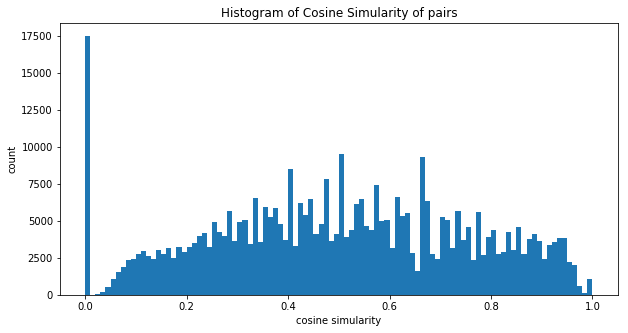

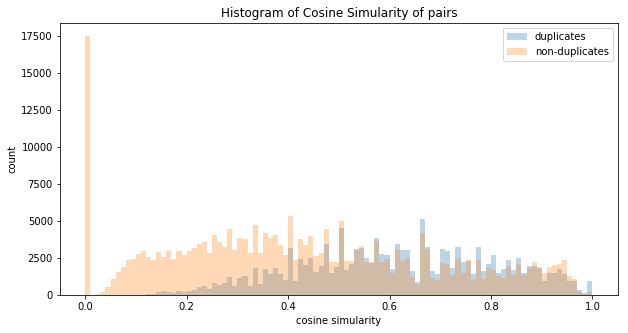

(best boundary = 0.499346)
trivial cosine predictor accuracy 0.657651


In [10]:
cs_all = [cosine_simularity_string(d[q1], d[q2]) for d in data]

plt.title('Histogram of Cosine Simularity of pairs')
plt.xlabel('cosine simularity')
plt.ylabel('count')
bins = np.arange(0,1.01,.01)
plt.hist(cs_all, bins=bins)
plt.show()

cs_all_dup = [cosine_simularity_string(d[q1], d[q2]) for d in data if d[dup] == '1']
cs_all_non = [cosine_simularity_string(d[q1], d[q2]) for d in data if d[dup] == '0']

plt.title('Histogram of Cosine Simularity of pairs')
plt.xlabel('cosine simularity')
plt.ylabel('count')

plt.hist(cs_all_dup, bins=bins, alpha=0.3, label='duplicates')
plt.hist(cs_all_non, bins=bins, alpha=0.3, label='non-duplicates')
plt.legend(loc='best')
plt.show()

# Trivial predictor
X = [cosine_simularity_string(d[q1], d[q2]) for d in data]
y = [int(d[dup]) for d in data]

# weigted average of averages of dup vs non dup
best_boundary = (np.mean(cs_all_dup)*len(cs_all_dup)+np.mean(cs_all_non)*len(cs_all_non))/len(cs_all)
print("(best boundary = %f)"%best_boundary)

def trivial_predictor(x):
    if x > best_boundary:
        return 1
    else:
        return 0

tp_cos_accuracy = float(sum([1 for xi, yi in zip(X,y) if trivial_predictor(xi) == yi]))/len(y)
print('trivial cosine predictor accuracy %f'%tp_cos_accuracy)

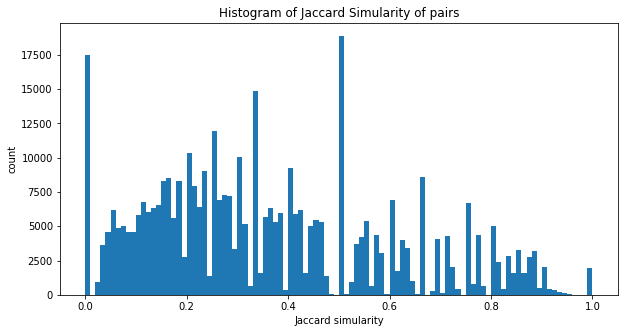

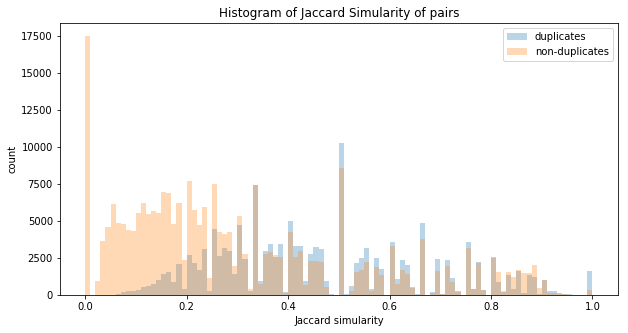

(best boundary = 0.362028)
trivial Jaccard predictor accuracy 0.666574


In [11]:
jc_all = [jaccard_simularity_string(d[q1], d[q2]) for d in data]

plt.title('Histogram of Jaccard Simularity of pairs')
plt.xlabel('Jaccard simularity')
plt.ylabel('count')
bins = np.arange(0,1.01,.01)
plt.hist(jc_all, bins=bins)
plt.show()

jc_all_dup = [jaccard_simularity_string(d[q1], d[q2]) for d in data if d[dup] == '1']
jc_all_non = [jaccard_simularity_string(d[q1], d[q2]) for d in data if d[dup] == '0']

plt.title('Histogram of Jaccard Simularity of pairs')
plt.xlabel('Jaccard simularity')
plt.ylabel('count')

plt.hist(jc_all_dup, bins=bins, alpha=0.3, label='duplicates')
plt.hist(jc_all_non, bins=bins, alpha=0.3, label='non-duplicates')
plt.legend(loc='best')
plt.show()

# Trivial predictor
X = [jaccard_simularity_string(d[q1], d[q2]) for d in data]

# weigted average of averages of dup vs non dup
best_boundary = (np.mean(jc_all_dup)*len(jc_all_dup)+np.mean(jc_all_non)*len(jc_all_non))/len(jc_all)
print("(best boundary = %f)"%best_boundary)

def trivial_predictor(x):
    if x > best_boundary:
        return 1
    else:
        return 0

tp_jc_accuracy = float(sum([1 for xi, yi in zip(X,y) if trivial_predictor(xi) == yi]))/len(y)
print('trivial Jaccard predictor accuracy %f'%tp_jc_accuracy)

In [12]:
math.log10(2)

0.3010299956639812

In [13]:
def sum_tf_idf(s1,s2):
    '''
    returns the sum of the tf-idf of each word in
    both strings
    '''
    
    d1 = vectorize_string(s1)
    d2 = vectorize_string(s2)
    
    idf = {}
    for word in d1:
        if word in d1 and word in d2:
            idf[word] = 0
        else:
            idf[word] = 0.3010299956639812
    for word in d2:
        if word not in idf:
            idf[word] = 0.3010299956639812
    
    tf_idf = {}
    for word in d1:
        tf_idf[word] = float(d1[word])/len(d1)*idf[word]
    for word in d2:
        if word not in tf_idf:
            tf_idf[word] = float(d2[word])/len(d2)*idf[word]
            
    total = 0
    for word in tf_idf:
        total += tf_idf[word]
        
    return total


# pairwise idf

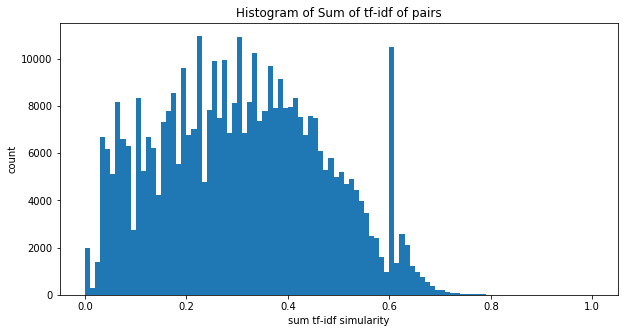

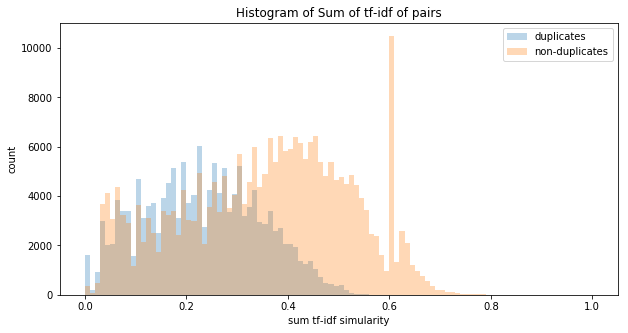

(best boundary = 0.309740)
trivial Sum tf-idf predictor accuracy 0.665026


In [14]:
tfidf_all = [sum_tf_idf(d[q1], d[q2]) for d in data]

plt.title('Histogram of Sum of tf-idf of pairs')
plt.xlabel('sum tf-idf simularity')
plt.ylabel('count')
bins = np.arange(0,1.01,.01)
plt.hist(tfidf_all, bins=bins)
plt.show()

tfidf_dup = [sum_tf_idf(d[q1], d[q2]) for d in data if d[dup] == '1']
tfidf_non = [sum_tf_idf(d[q1], d[q2]) for d in data if d[dup] == '0']

plt.title('Histogram of Sum of tf-idf of pairs')
plt.xlabel('sum tf-idf simularity')
plt.ylabel('count')

plt.hist(tfidf_dup, bins=bins, alpha=0.3, label='duplicates')
plt.hist(tfidf_non, bins=bins, alpha=0.3, label='non-duplicates')
plt.legend(loc='best')
plt.show()

# Trivial predictor
X = [sum_tf_idf(d[q1], d[q2]) for d in data]

# weigted average of averages of dup vs non dup
best_boundary = (np.mean(tfidf_dup)*len(tfidf_dup)+np.mean(tfidf_non)*len(tfidf_non))/len(tfidf_all)
print("(best boundary = %f)"%best_boundary)

def trivial_predictor(x):
    if x < best_boundary:
        return 1
    else:
        return 0

tp_tfidf_accuracy = float(sum([1 for xi, yi in zip(X,y) if trivial_predictor(xi) == yi]))/len(y)
print('trivial Sum tf-idf predictor accuracy %f'%tp_tfidf_accuracy)

# global idf

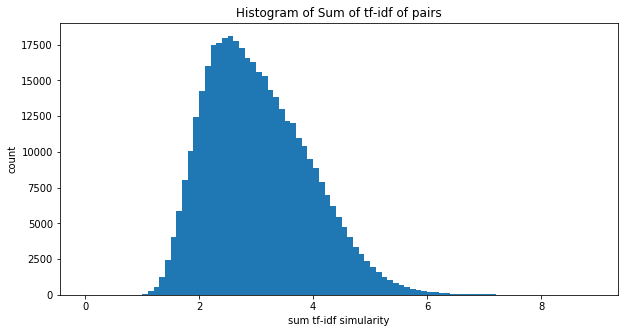

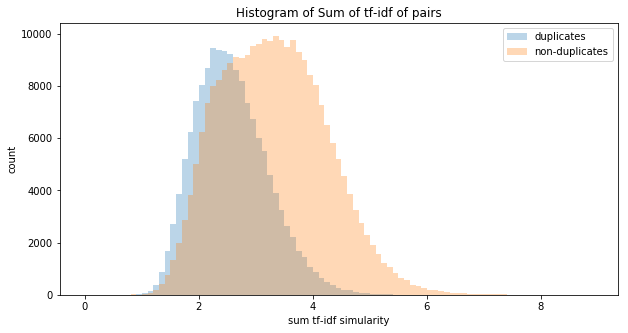

(best boundary = 3.040666)
trivial Sum tf-idf predictor accuracy 0.659133


In [ ]:
idf = {}
for q in uniq_questions:
    d = vectorize_string(q)
    for word in d:
        if word in idf:
            idf[word] += 1
        else:
            idf[word] = 1

for word in idf:
    idf[word] = math.log10(len(uniq_questions)/idf[word])

def sum_tf_idf(s1,s2):
    '''
    returns the sum of the tf-idf of each word in
    both strings
    '''
    
    d1 = vectorize_string(s1)
    d2 = vectorize_string(s2)
    
    tf_idf = {}
    for word in d1:
        tf_idf[word] = float(d1[word])/len(d1)*idf[word]
    for word in d2:
        if word not in tf_idf:
            tf_idf[word] = float(d2[word])/len(d2)*idf[word]
            
    total = 0
    for word in tf_idf:
        total += tf_idf[word]
        
    return total


tfidf_all = [sum_tf_idf(d[q1], d[q2]) for d in data]

plt.title('Histogram of Sum of tf-idf of pairs')
plt.xlabel('sum tf-idf simularity')
plt.ylabel('count')
bins = np.arange(0,9,.1)
plt.hist(tfidf_all, bins=bins)
plt.show()

tfidf_dup = [sum_tf_idf(d[q1], d[q2]) for d in data if d[dup] == '1']
tfidf_non = [sum_tf_idf(d[q1], d[q2]) for d in data if d[dup] == '0']

plt.title('Histogram of Sum of tf-idf of pairs')
plt.xlabel('sum tf-idf simularity')
plt.ylabel('count')

plt.hist(tfidf_dup, bins=bins, alpha=0.3, label='duplicates')
plt.hist(tfidf_non, bins=bins, alpha=0.3, label='non-duplicates')
plt.legend(loc='best')
plt.show()

# Trivial predictor
X = [sum_tf_idf(d[q1], d[q2]) for d in data]

# weigted average of averages of dup vs non dup
best_boundary = (np.mean(tfidf_dup)*len(tfidf_dup)+np.mean(tfidf_non)*len(tfidf_non))/len(tfidf_all)
print("(best boundary = %f)"%best_boundary)

def trivial_predictor(x):
    if x < best_boundary:
        return 1
    else:
        return 0

tp_tfidf_accuracy = float(sum([1 for xi, yi in zip(X,y) if trivial_predictor(xi) == yi]))/len(y)
print('trivial Sum tf-idf predictor accuracy %f'%tp_tfidf_accuracy)

# tf\*idf\*gidf

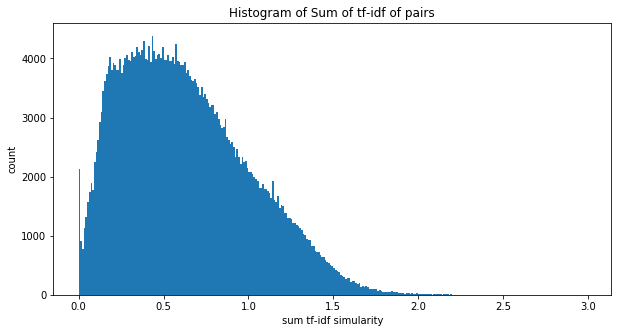

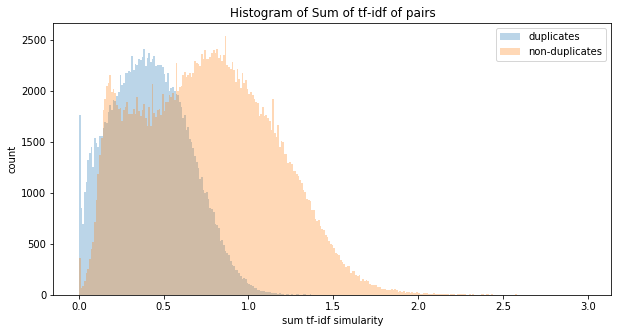

(best boundary = 0.630915)
trivial Sum tf-idf predictor accuracy 0.679805


In [ ]:
gidf = {}
for q in uniq_questions:
    d = vectorize_string(q)
    for word in d:
        if word in gidf:
            gidf[word] += 1
        else:
            gidf[word] = 1

for word in gidf:
    gidf[word] = math.log10(len(uniq_questions)/gidf[word])

def sum_tf_idf(s1,s2):
    '''
    returns the sum of the tf-idf of each word in
    both strings
    '''
    
    d1 = vectorize_string(s1)
    d2 = vectorize_string(s2)
    
    idf = {}
    for word in d1:
        if word in d1 and word in d2:
            idf[word] = 0
        else:
            idf[word] = 0.3010299956639812
    for word in d2:
        if word not in idf:
            idf[word] = 0.3010299956639812
    
    tf_idf = {}
    for word in d1:
        tf_idf[word] = float(d1[word])/len(d1)*idf[word]*gidf[word]
    for word in d2:
        if word not in tf_idf:
            tf_idf[word] = float(d2[word])/len(d2)*idf[word]*gidf[word]
            
    total = 0
    for word in tf_idf:
        total += tf_idf[word]
        
    return total



tfidf_all = [sum_tf_idf(d[q1], d[q2]) for d in data]

plt.title('Histogram of Sum of tf-idf of pairs')
plt.xlabel('sum tf-idf simularity')
plt.ylabel('count')
bins = np.arange(0,3,.01)
plt.hist(tfidf_all, bins=bins)
plt.show()

tfidf_dup = [sum_tf_idf(d[q1], d[q2]) for d in data if d[dup] == '1']
tfidf_non = [sum_tf_idf(d[q1], d[q2]) for d in data if d[dup] == '0']

plt.title('Histogram of Sum of tf-idf of pairs')
plt.xlabel('sum tf-idf simularity')
plt.ylabel('count')

plt.hist(tfidf_dup, bins=bins, alpha=0.3, label='duplicates')
plt.hist(tfidf_non, bins=bins, alpha=0.3, label='non-duplicates')
plt.legend(loc='best')
plt.show()

# Trivial predictor
X = [sum_tf_idf(d[q1], d[q2]) for d in data]

# weigted average of averages of dup vs non dup
best_boundary = (np.mean(tfidf_dup)*len(tfidf_dup)+np.mean(tfidf_non)*len(tfidf_non))/len(tfidf_all)
print("(best boundary = %f)"%best_boundary)

def trivial_predictor(x):
    if x < best_boundary:
        return 1
    else:
        return 0

tp_tfidf_accuracy = float(sum([1 for xi, yi in zip(X,y) if trivial_predictor(xi) == yi]))/len(y)
print('trivial Sum tf-idf predictor accuracy %f'%tp_tfidf_accuracy)